In [ ]:
## Copyright Notice

## https://www.tensorflow.org/tutorials/keras/basic_classification 

## https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb 

# Copyright 2018 The TensorFlow Authors

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Train your Neural Network

Keras is a high-level API to build and train deep learning models. It's used for fast prototyping, advanced research, and production, with three key advantages:

_User friendly_
Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
_Modular and composable_
Keras models are made by connecting configurable building blocks together, with few restrictions.
_Easy to extend_
Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models.

In [34]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


# The Data

You can access the Fashion MNIST directly from TensorFlow.
We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. 

In [35]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Loading the dataset returns four NumPy arrays:**

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

There are 60,000 labels in the training set

In [37]:
train_images.shape

(60000, 28, 28)

In [38]:
len(train_labels)

60000


Each label is an integer between 0 and 9:


In [39]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)


There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:



In [40]:
test_images.shape

(10000, 28, 28)

In [41]:
len(test_labels)

10000


The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:


  

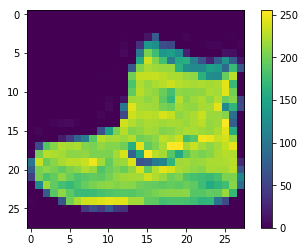

In [42]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)



We scale these values to a range of 0 to 1 before feeding to the neural network model. 



                     
    

In [43]:
train_images = train_images / 255.0

test_images = test_images / 255.0



This forms a check before we build and train the network.
Display the first 25 images from the training set and display the class name below each image. 

 

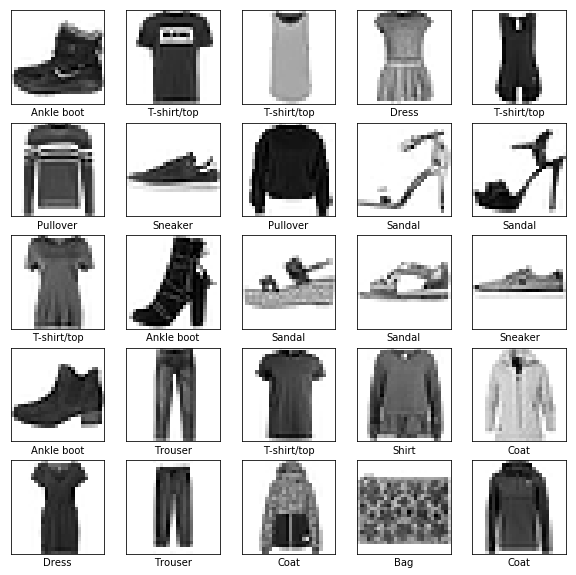

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


**Setup the layers**

The basic building block of a neural network is the _layer_.

Layers extract representations from the data fed into them. 

Most of deep learning consists of chaining together simple layers. 
tf.keras.layers.Dense has parameters that are learned during training.


The Dense layers are densely-connected, or fully-connected, neural layers. 

The first Dense layer has 128 nodes (or neurons). 

The second (and last) layer is a 10-node softmax layer. This returns an array of 10 probability scores that sum to 1. 

Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes that were defined above e.g. ankle boot.

In [46]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.4952 - acc: 0.8268
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3784 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.3384 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3141 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2979 - acc: 0.8898


In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/step
Test accuracy: 0.8633


In [49]:
predictions = model.predict(test_images)

In [50]:
predictions[0]

array([3.2196074e-06, 6.9887207e-09, 5.5548793e-07, 9.5484047e-09,
       1.5203425e-07, 1.4466199e-03, 3.0749904e-06, 4.0765051e-03,
       5.9337913e-07, 9.9446929e-01], dtype=float32)

In [51]:
np.argmax(predictions[0])

9

In [52]:
test_labels[0]

9

In [53]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

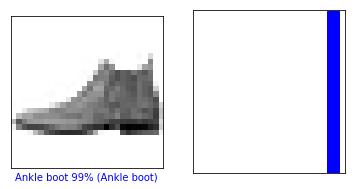

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

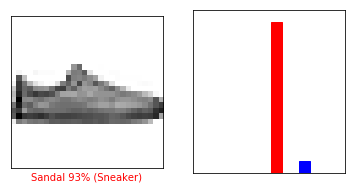

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

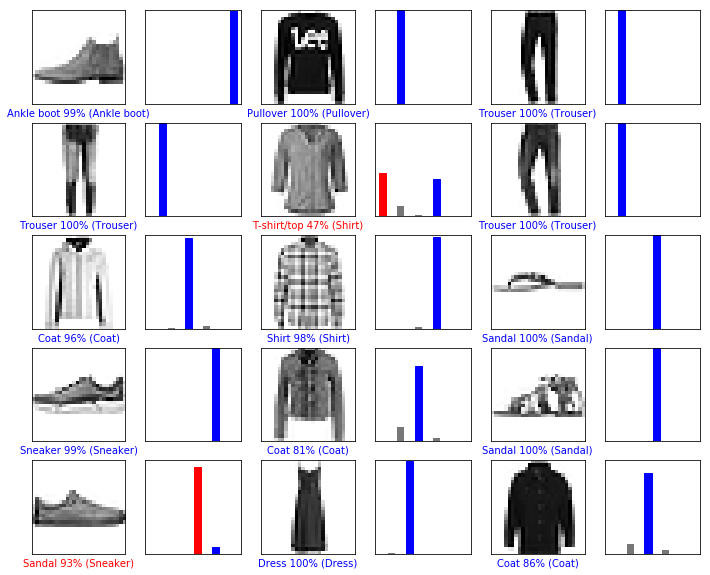

In [56]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [57]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [58]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [59]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2195981e-06 6.9887074e-09 5.5548685e-07 9.5483861e-09 1.5203410e-07
  1.4466192e-03 3.0749904e-06 4.0765051e-03 5.9337799e-07 9.9446929e-01]]


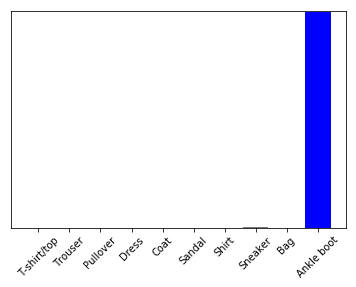

In [60]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])